## 결정 트리

#### 로지스틱 회귀로 와인 분류 하기 

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

## alcohol(알코올 도수)	sugar(당도)	pH(pH)	class(0=> 레드와인, 1=화이트와인)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# 전체 정보 보기
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
# 열에 대한 간략한 통계를 출력
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


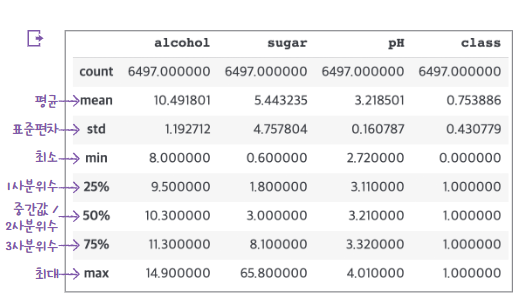

In [4]:
from IPython.display import Image, display
display(Image(filename="img/img54.png", width=800, height=600))

In [5]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

In [6]:
from sklearn.model_selection import train_test_split

# train 데이터와 test 데이터 만들기
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
# 표준화 하기 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [9]:
# 로지스틱 회귀 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [10]:
# coef_ => 회귀 계수(기울기) => x가 1증가 할때 마다 y가 얼마나 변하는지 보여줌 
# intercept_ => 절편 => 입력값이 0일때, 예측되는 출력값을 말한다.
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### 결정 트리란?
> **데이터의 특징(feature)** 을 **기준**으로 **조건 분기(if-then 규칙)** 를 만들어 **분류(Classification) 또는 회귀(Regression) 문제를 푸는 알고리즘**

예시)  "물고기 데이터"에서 ‘무게’, ‘길이’, ‘높이’ 등으로 어떤 종(Species) 인지를 예측한다고 할 때

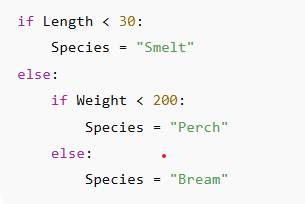

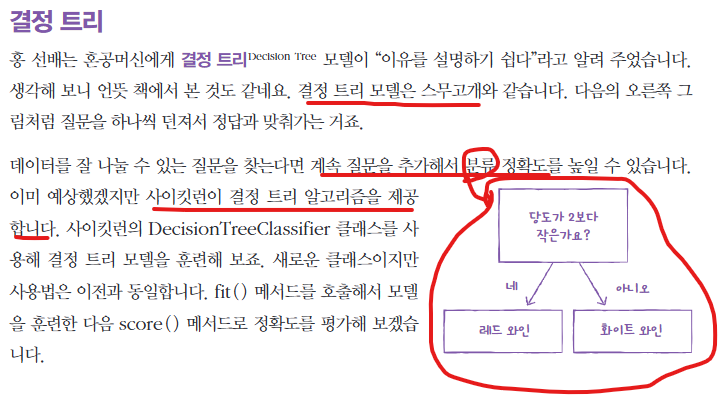

In [11]:
display(Image(filename="img/img55.png", width=400, height=200))
display(Image(filename="img/img56.png", width=800, height=600))

In [12]:
## 분류용 결정 트리 모델
from sklearn.tree import DecisionTreeClassifier
# random_state=42 는 실전에는 필요 없음
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target)) # 화이트 와인 
print(dt.score(test_scaled, test_target))  # 과대 적합되어 있

0.996921300750433
0.8592307692307692


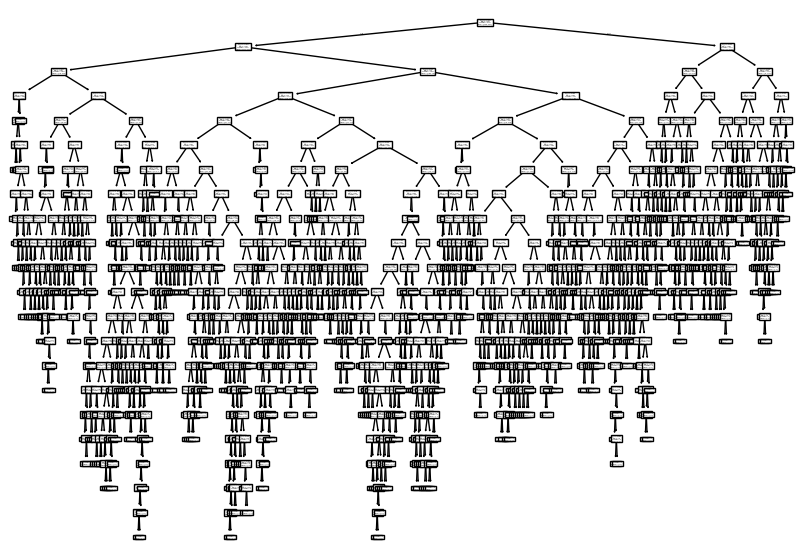

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 모델이 학습한 모든 분기 조건을 그림으로 보여줌
# 각 노드마다 다른 특성(alcohol, sugar, pH 등) 으로 분기합니다.
plt.figure(figsize=(10,7))
# 트리의 모든 노드를 표시 (기본적으로 제한 없음)
plot_tree(dt)
plt.show()

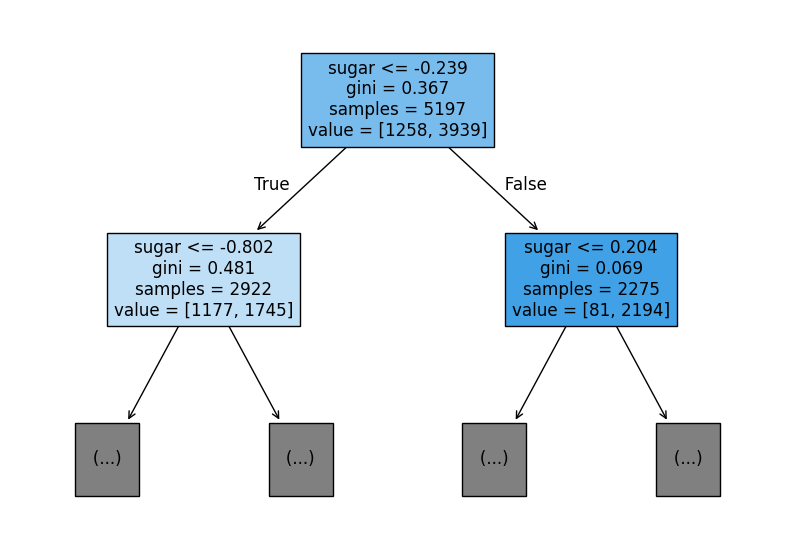

In [14]:
plt.figure(figsize=(10,7))
# 트리의 “최상위 분기(루트 + 바로 아래 노드)”만 표시
# 모델 전체 중 가장 중요한 첫 번째 분할 기준만 보여줌
# max_depth=1
plot_tree(dt, max_depth=1, filled=True,
          feature_names=train_input.columns)
plt.show()

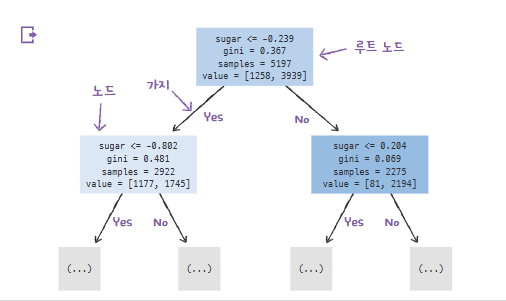

In [15]:
display(Image(filename="img/img57.png", width=600, height=600))

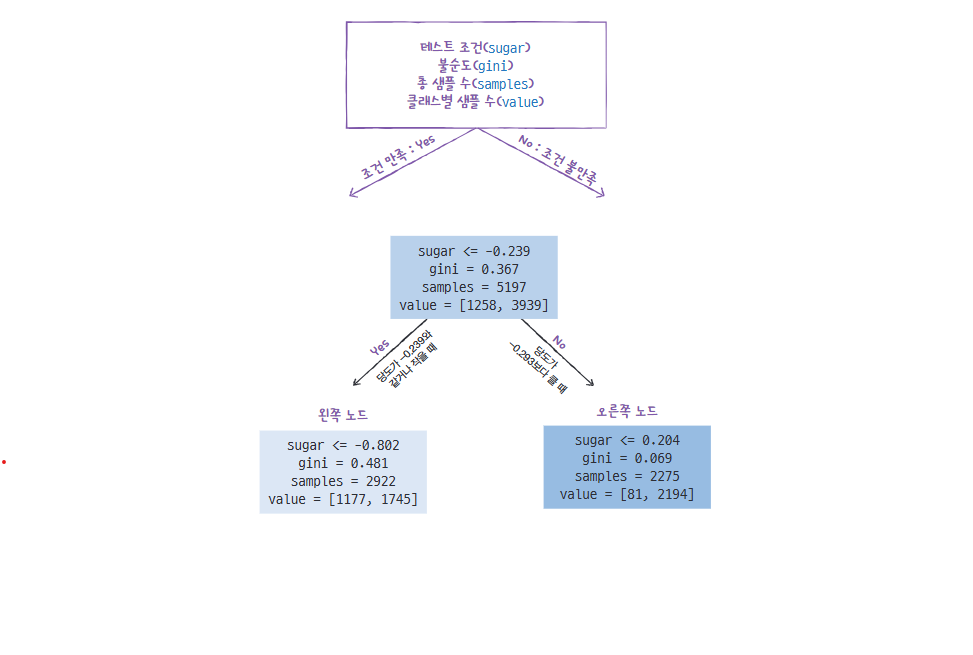

In [16]:
display(Image(filename="img/img58.png", width=800, height=600))
# 불순도 란 “한 노드 안에 서로 다른 클래스가 얼마나 섞여 있는가”를 나타내는 지표입니다.
# 불순도(Gini) 가 0 → 오직 한 클래스만 존재 (완전히 순수함)
# 불순도(Gini) 가 0.5 → 두 클래스가 반반으로 섞여 있음 (가장 불순함)
# -------------------------------------------------------
# gini 값이 작을수록 → 한쪽 클래스가 훨씬 많음 → 분류가 명확함 ✅
# gini 값이 클수록 → 클래스가 섞여 있음 → 불확실함 ❌
# -------------------------------------------------------
# 루트 노드(gini=0.367) → 처음엔 클래스가 섞여 있음
# 왼쪽 노드(gini=0.481) → 여전히 혼합 상태
# 오른쪽 노드(gini=0.069) → 거의 한쪽 클래스만 남음 → 잘 분리됨!
# 즉, 결정 트리가 데이터를 “순수한 그룹으로 점점 나누는 과정” 이라고 생각하면 됩니다
# -------------------------------------------------------
# 왼쪽으로 갈수록” 조건을 만족하는 데이터들이 모이는 방향이고,
# 그 과정에서 트리는 불순도를 낮추는 방향으로 학습하지만
# 반드시 왼쪽이 오른쪽보다 항상 순수하다고는 할 수 없습니다. (데이터에 따라 어느 쪽이 더 순수해질지는 달라요.)
# 오른쪽으로 갈수록 “조건을 만족하지 않는”, 즉 특성 값이 더 큰 데이터들이 모인다.

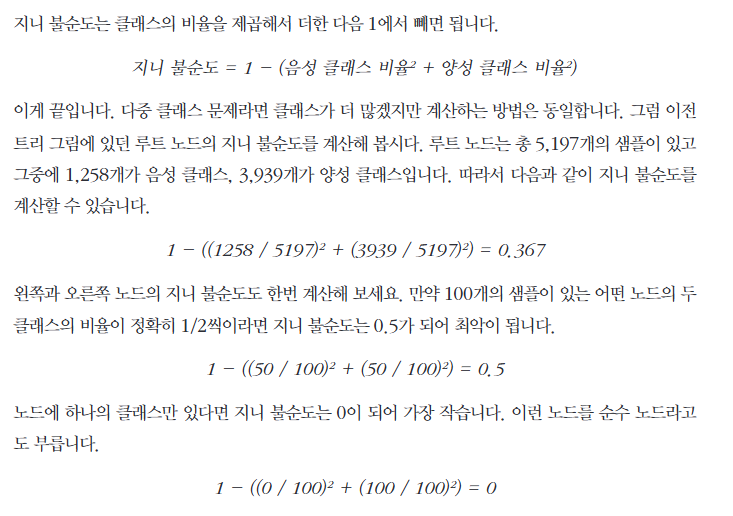

In [17]:
display(Image(filename="img/img59.png", width=800, height=600))

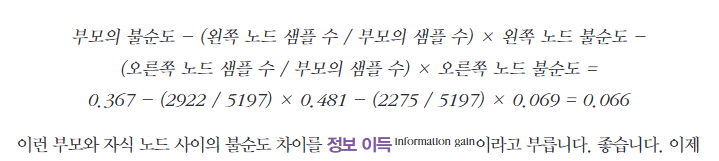

In [18]:
display(Image(filename="img/img60.png", width=800, height=600))

### 가지치기란?
> 결정 트리가 너무 복잡하게 자라는 것을 막기 위해, 불필요한 가지(branch)를 잘라내는 과정입니다.
- 즉, 트리가 너무 깊어지면 훈련 데이터에 과도하게 맞춰지는 과적합(overfitting) 이 발생합니다.
- 이를 방지하기 위해, 트리의 일부 가지를 잘라내거나 성장을 제한합니다.
- 이 과정을 “가지치기(pruning)” 라고 부릅니다.

In [19]:
# max_depth=3 => 가지 치기 
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


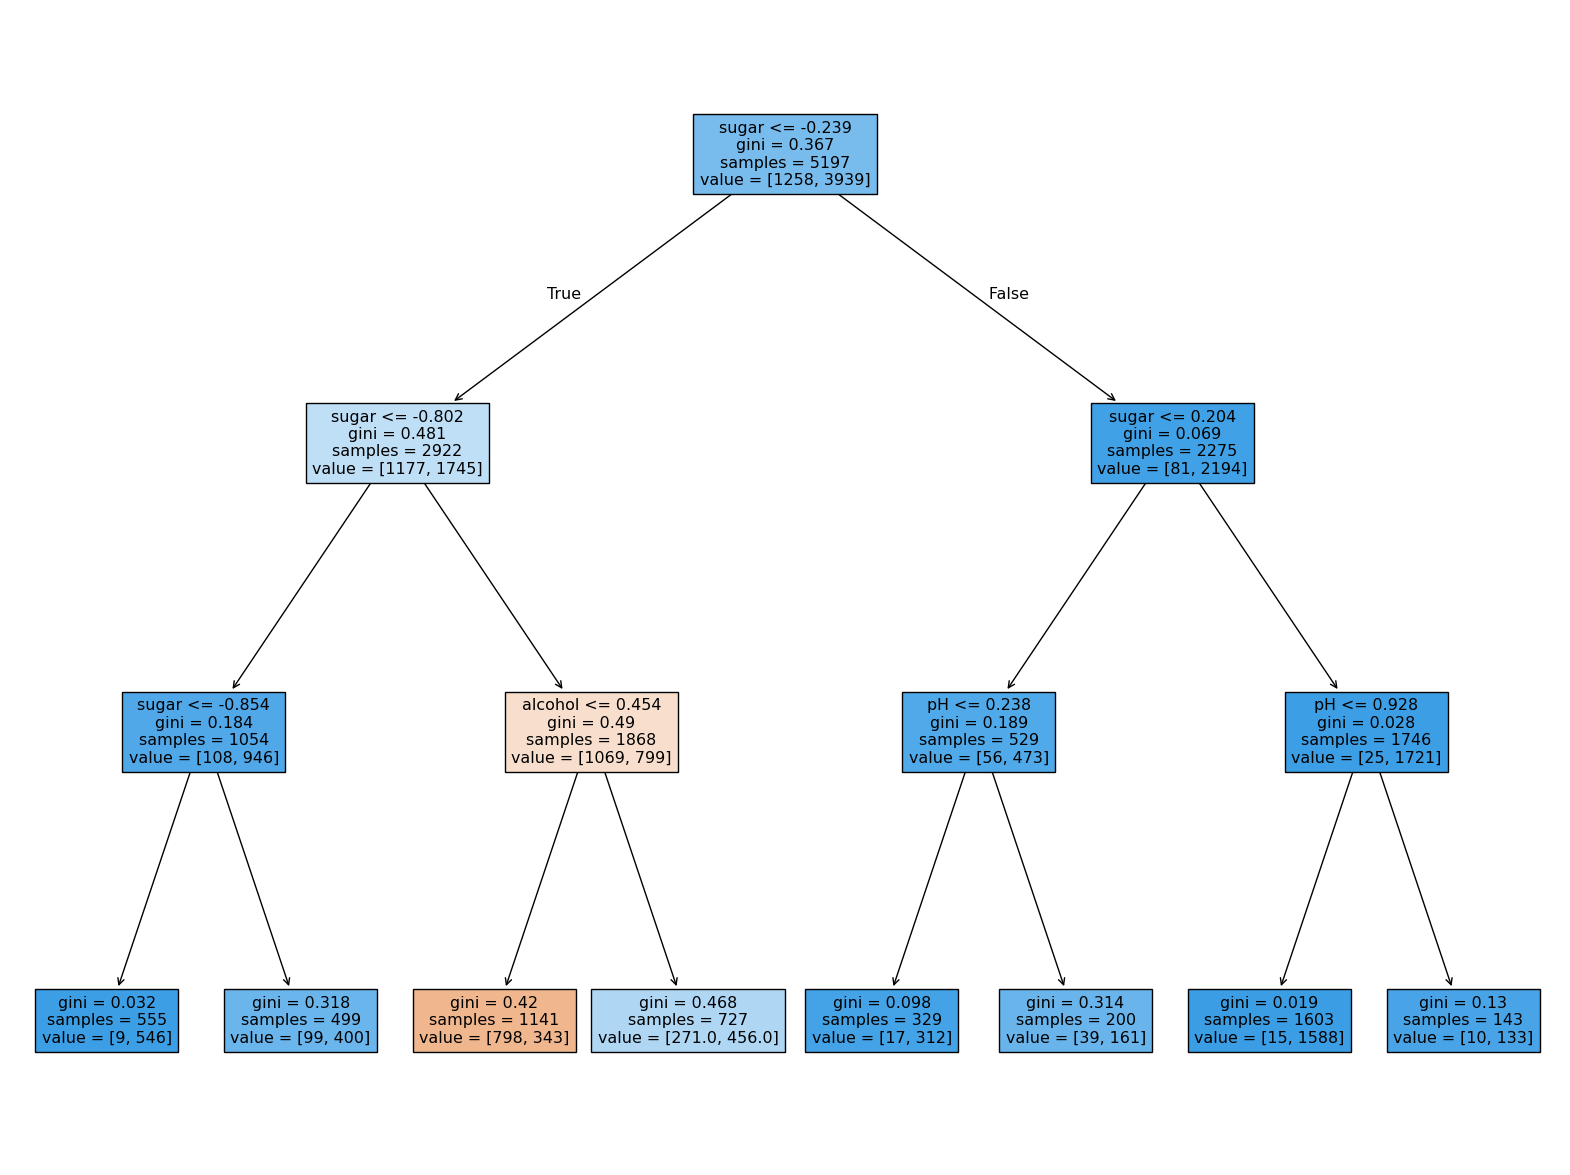

In [20]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=train_input.columns)
plt.show()

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


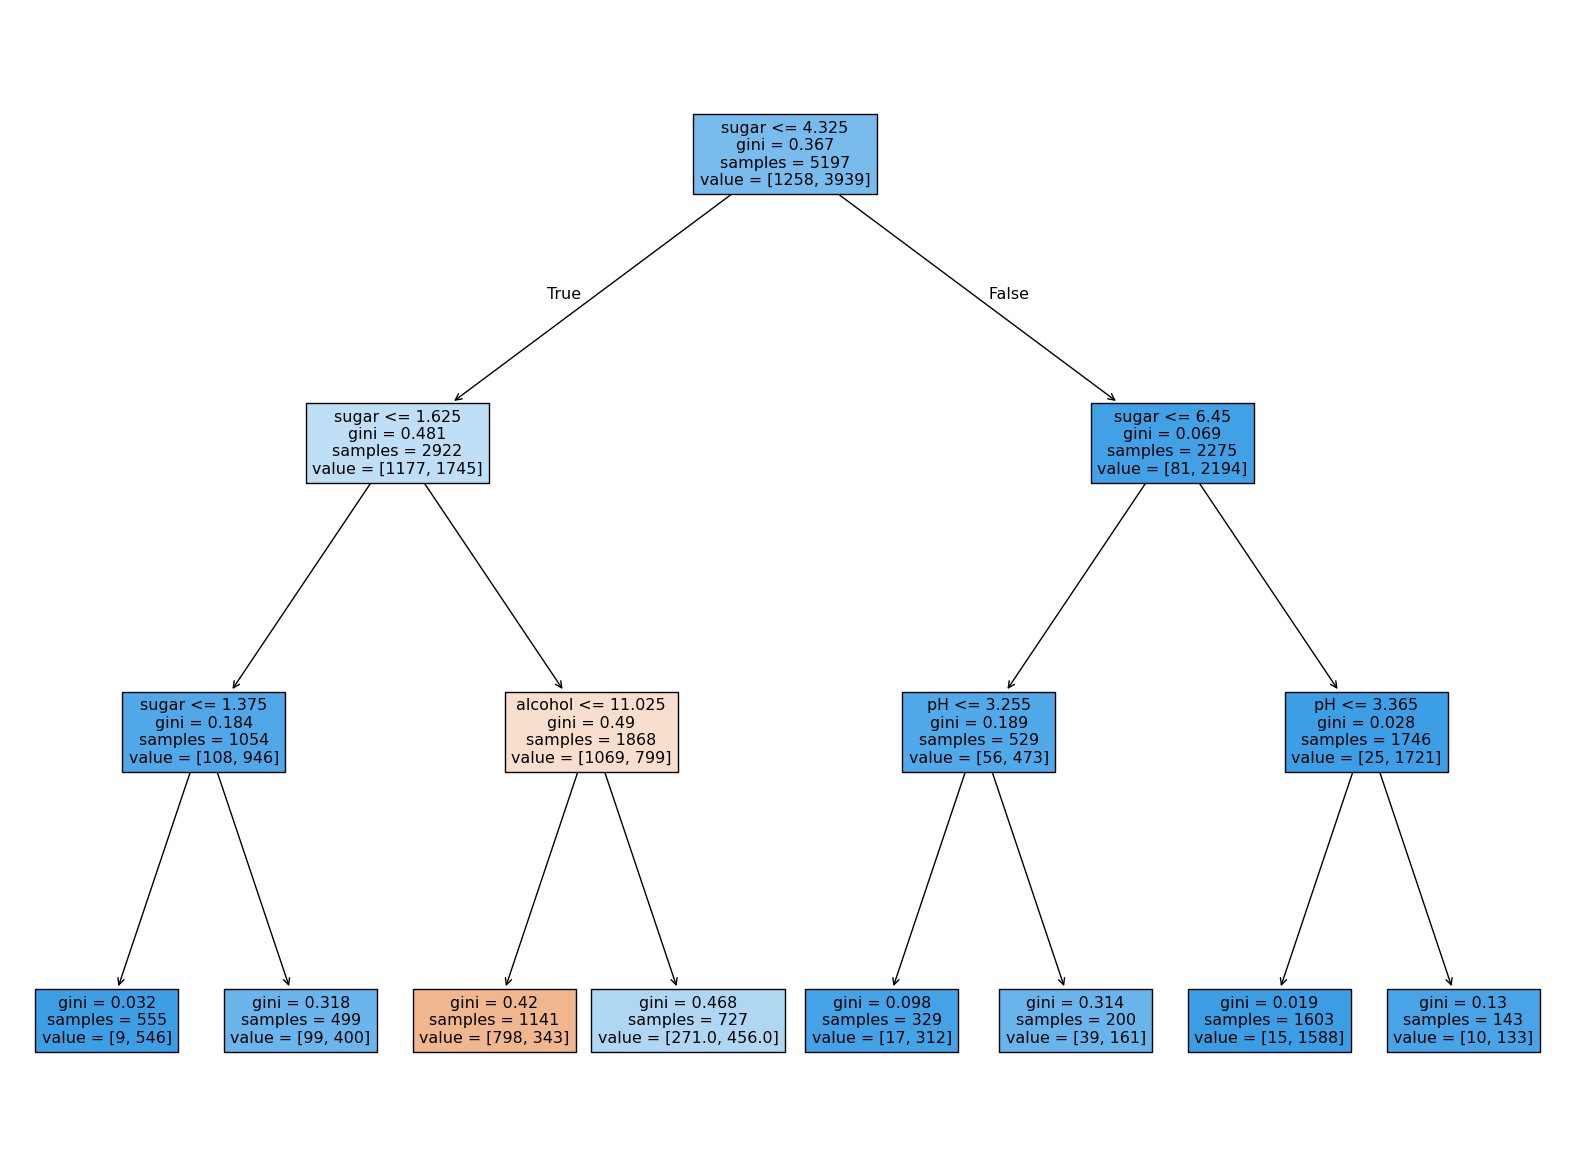

In [22]:
# 각 노드는 가장 많은 비중을 차지한 클래스의 색깔로 채워집니다.
# 파란색 계열 → 클래스 0 (예: ‘레드 와인’)
# 주황색 계열 → 클래스 1 (예: ‘화이트 와인’)
# 색의 진한 색은 불순도가 낮음 ,  옅은 색은 분순도가 높음
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=train_input.columns)
plt.show()

In [23]:
print(dt.feature_importances_)
# 결정 트리가 학습 과정에서 각 특성(feature) 이
# 결정(분류)에 얼마나 기여했는지를 나타내는 “중요도 점수”입니다.
# sugar가 트리 분류에 가장 큰 영향을 미쳤다 (86.7%)
# alcohol은 약간 영향을 주었고 (12.3%)
# pH는 거의 영향을 주지 않았다 (1%)

[0.12345626 0.86862934 0.0079144 ]
